In [2]:
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup and Load data

In [3]:
# Load data
data = pd.read_csv("/Users/krit/Desktop/NewExpress-redemptions.csv")
# Cmap
cmap_dist = sns.color_palette('blend:#FF00F7,#1E98FD' ,as_cmap=True)
cmap_dist2 = sns.color_palette('blend:#A73A8D,#4A3180' ,as_cmap=True)
# cmap_heat = sns.color_palette("dark:#A73A8D_r", as_cmap=True)
cmap_heat = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

# Checking the data

In [4]:
# Take a look
data.head()

,code,customer id,base amount,discount/coin amount,final amount,redemption at
0,NEWEXPRESS,c3882442-4a0e-4b15-b2d3-2b48e9fd4971-Hfu46YDz,86,20,66,4/30/2023 22:40
1,NEWEXPRESS,02e6ddb5-3081-4d1e-975e-f085dbbeedde-y6GWAJn6,74,20,54,4/30/2023 21:53
2,NEWEXPRESS,eeedafcd-a14a-49f2-84ad-550d6d6eb488-CK2V4MCD,101,20,81,4/30/2023 20:38
3,NEWEXPRESS,eeedafcd-a14a-49f2-84ad-550d6d6eb488-CK2V4MCD,101,20,81,4/30/2023 19:30
4,NEWEXPRESS,e9181aaf-3576-49b8-92cb-03c3d274fcfb-PjtNHHzR,56,20,36,4/30/2023 19:27


In [5]:
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code                  4964 non-null   object
 1   customer id           4964 non-null   object
 2   base amount           4964 non-null   int64 
 3   discount/coin amount  4964 non-null   int64 
 4   final amount          4964 non-null   int64 
 5   redemption at         4964 non-null   object
dtypes: int64(3), object(3)
memory usage: 232.8+ KB


\#5 is object which it should be "datetime64[ns]

In [6]:
data.describe()

,base amount,discount/coin amount,final amount
count,4964.000000,4964.0,4964.000000
mean,91.764706,20.0,71.764706
std,62.713336,0.0,62.713336
min,39.000000,20.0,19.000000
25%,54.000000,20.0,34.000000
50%,72.000000,20.0,52.000000
75%,105.000000,20.0,85.000000
max,652.000000,20.0,632.000000


# Data cleaning

In [7]:
# Change object to datetime format
data['redemption at'] = pd.to_datetime(data['redemption at'], format='%m/%d/%Y %H:%M')

In [8]:
# Drop March since it not full month, and use only April to avoid bias
data['redemption month'] = pd.to_datetime(data['redemption at'], format='%m/%d/%Y %H:%M').dt.month
data = data[data['redemption month'] == 4]

In [9]:
# Get hour, daym dayofweek for futher analysis
data['redemption time'] = pd.to_datetime(data['redemption at'], format='%m/%d/%Y %H:%M').dt.hour
data['redemption day of month'] = pd.to_datetime(data['redemption at'], format='%m/%d/%Y %H:%M').dt.day
data['redemption day of week'] = pd.to_datetime(data['redemption at'], format='%m/%d/%Y %H:%M').dt.dayofweek # 0 = Monday

# Analysis

In [10]:
# Get quantile 50% of all column
data.quantile(q=0.5, axis=0, numeric_only=True)

base amount                72.0
discount/coin amount       20.0
final amount               52.0
redemption month            4.0
redemption time            14.0
redemption day of month    15.0
redemption day of week      3.0
Name: 0.5, dtype: float64

Users use the code mostly on 13:00-14:00 which is: 240 times
The 50% percentile of total value per hour was 9875.0
The 50% percentile of value per order was 109.0


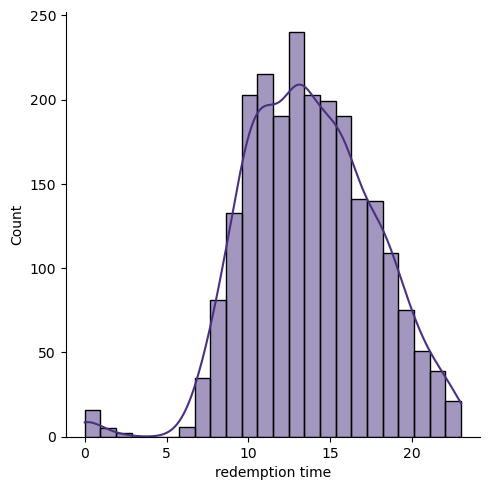

In [11]:
# What time do users use the code most?
# 14:00
sns.displot(data=data,x='redemption time',bins=24, kde=True, color='#4A3180')
print(f'Users use the code mostly on 13:00-14:00 which is: {len(data[data["redemption time"] == 13])} times')
# Percentile
print('The 50% percentile of total value per hour was {}'.format(data.groupby('redemption time')['base amount'].sum().quantile(q=0.5)))
print('The 50% percentile of value per order was {}'.format(data.groupby('redemption time')['base amount'].count().quantile(q=0.5)))

Users use the code mostly on day of 3rd which is: 132 times
The 50% percentile of total value per day of month was 7315.0
The 50% percentile of value per order was 77.0


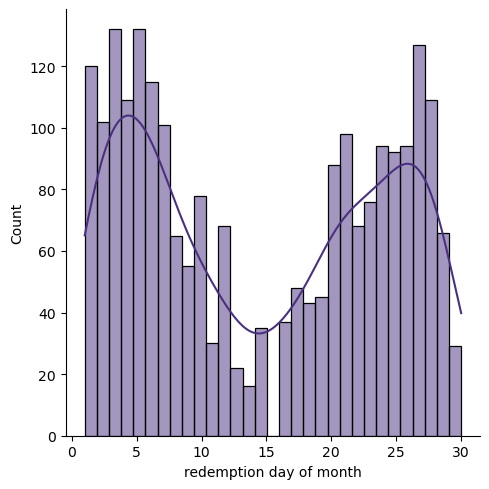

In [12]:
# What day of the month
sns.displot(data=data,x='redemption day of month',bins=31, kde=True, color='#4A3180')
print(f'Users use the code mostly on day of 3rd which is: {len(data[data["redemption day of month"] == 3])} times')
# Percentile
print('The 50% percentile of total value per day of month was {}'.format(data.groupby('redemption day of month')['base amount'].sum().quantile(q=0.5)))
print('The 50% percentile of value per order was {}'.format(data.groupby('redemption day of month')['base amount'].count().quantile(q=0.5)))

352


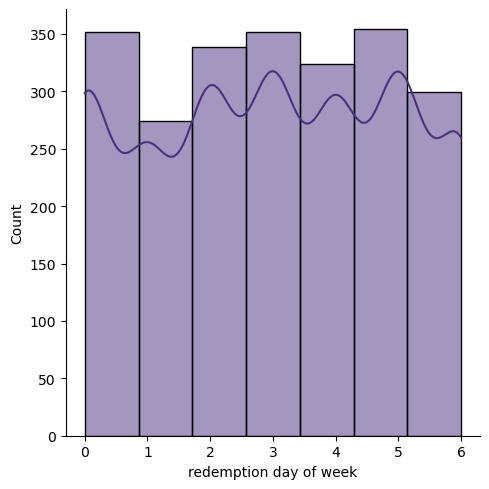

In [13]:
# What day of the month
sns.displot(data=data,x='redemption day of week',bins=7, kde=True, color='#4A3180')
print(len(data[data['redemption day of week'] == 3]))

The 50% percentile of value per order was 72.0


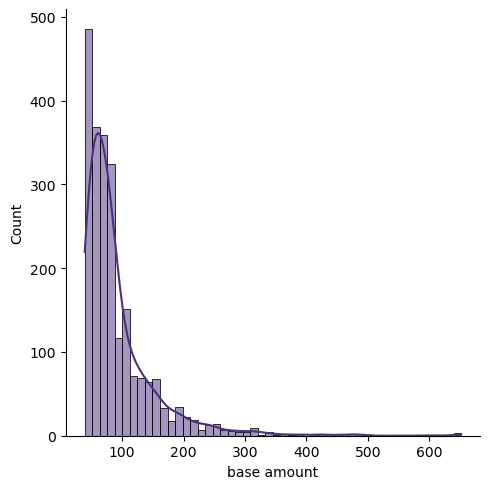

In [14]:
# What value per order
sns.displot(data=data,x='base amount',bins=50, kde=True, color='#4A3180')
print('The 50% percentile of value per order was {}'.format(data['base amount'].quantile(q=0.5)))

In [15]:
# Corelation day of week, day of month and total value
# Sum value
glue = data.pivot_table(index=['redemption time'], columns='redemption day of week', values='base amount', aggfunc=sum, fill_value=0)
glue

redemption day of week,0,1,2,3,4,5,6
redemption time,,,,,,,
0,538,0,534,486,434,119,248
1,0,0,56,142,0,0,74
2,0,0,0,54,0,260,0
6,240,93,278,0,0,0,0
7,320,929,207,757,101,408,764
8,1024,479,1566,1372,1493,986,996
9,2076,2190,1608,2065,2235,2344,281
10,4500,2243,2178,3148,2269,3068,1739
11,3109,2378,3397,1529,2737,3723,2233


<Axes: xlabel='redemption day of week', ylabel='redemption time'>

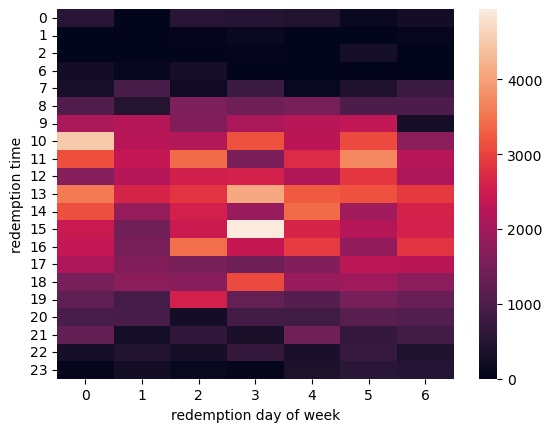

In [16]:
# Plot, Corelation day of week, day of month and total value
sns.heatmap(data=glue)

In [17]:
# Corelation hour, day of week, and total no. of order
glue = data.pivot_table(index='redemption time', columns='redemption day of week', values='base amount', aggfunc=len, fill_value=0)
glue

redemption day of week,0,1,2,3,4,5,6
redemption time,,,,,,,
0,2,0,5,3,3,2,1
1,0,0,1,3,0,0,1
2,0,0,0,1,0,1,0
6,3,1,2,0,0,0,0
7,4,6,3,8,1,4,9
8,13,5,13,12,14,12,12
9,27,24,19,20,19,20,4
10,37,25,27,38,27,31,18
11,34,29,39,18,29,38,28


<Axes: xlabel='redemption day of week', ylabel='redemption time'>

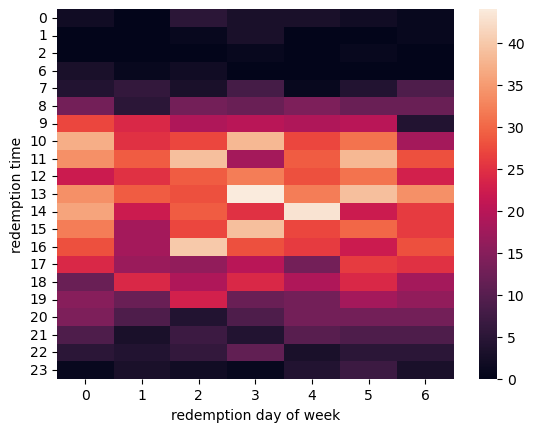

In [18]:
# Plot, Corelation hour, day of week, and total no. of order
sns.heatmap(data=glue)

In [19]:
# Corelation hour, day of month and total value
glue = data.pivot_table(index='redemption time', columns='redemption day of month', values='base amount', aggfunc=sum, fill_value=0)
glue

redemption day of month,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
redemption time,,,,,,,,,,,,,,,,,,,,,
0,39,0,0,0,0,48,360,0,0,0,...,74,80,248,538,0,422,248,0,0,0
1,0,0,0,0,0,42,0,0,0,0,...,0,0,0,0,0,56,100,0,0,74
2,0,0,0,0,0,0,0,260,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,93,78,0,0,0,0,0,...,0,0,0,240,0,0,0,0,0,0
7,84,228,219,440,123,78,0,0,102,0,...,0,0,166,101,148,0,237,101,324,268
8,570,376,324,135,838,0,363,132,333,66,...,590,0,240,374,74,557,401,370,284,47
9,1197,207,1046,603,759,734,183,270,0,138,...,1510,351,74,705,981,537,284,542,168,0
10,969,540,1080,596,392,786,1097,502,336,583,...,527,832,475,2423,957,963,1572,597,365,124
11,1111,648,1193,762,1333,285,299,126,402,625,...,1674,1027,616,1063,950,936,550,644,1006,279


<Axes: xlabel='redemption day of month', ylabel='redemption time'>

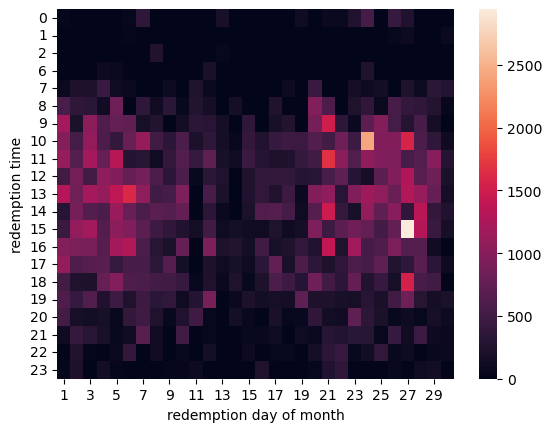

In [20]:
# Plot, Corelation hour, day of month and total value
sns.heatmap(data=glue)

In [21]:
# Corelation hour, day of month and total no. of order
glue = data.pivot_table(index='redemption time', columns='redemption day of month', values='base amount', aggfunc=len, fill_value=0)
glue

redemption day of month,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
redemption time,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,1,2,0,0,0,...,1,1,1,2,0,3,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
7,1,3,3,3,2,1,0,0,1,0,...,0,0,2,1,1,0,3,1,3,3
8,7,5,5,2,8,0,5,2,3,1,...,3,0,3,4,1,3,5,5,3,1
9,7,3,14,6,7,8,3,4,0,2,...,10,4,1,9,10,6,4,6,1,0
10,10,5,13,8,5,6,10,5,3,7,...,7,10,4,13,8,12,21,9,4,2
11,13,10,16,8,14,5,5,2,4,8,...,13,10,6,7,11,12,7,8,8,4


<Axes: xlabel='redemption day of month', ylabel='redemption time'>

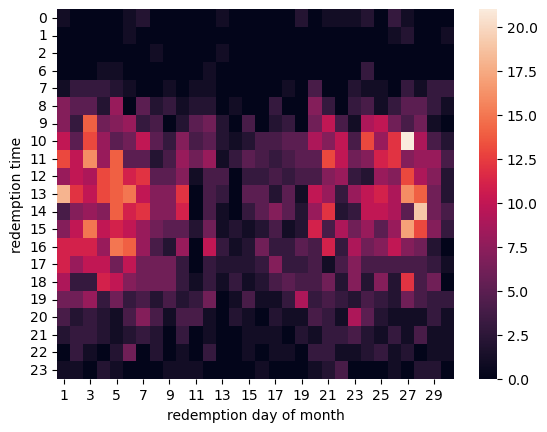

In [22]:
# Plot, Corelation hour, day of month and total no. of order
sns.heatmap(data=glue)

# Usage Data

## Load data

In [23]:
data2 = pd.read_csv("/Users/krit/Desktop/Express Usage 24-30 Apr 2023.csv")
data2.head()

,Order No.,Channel,Name,Date,Rider Name,Amount,Status
0,E230430-AA-0801,APP,ปลา,30/04/2023 23:25,NaN,37.2,Canceled
1,E230430-AA-0799,APP,วรวุฒิ สุทธิวนา,30/04/2023 23:24,NaN,76.8,Canceled
2,E230430-AA-0798,APP,wachiravit kornvathin,30/04/2023 23:05,NaN,56.0,Canceled
3,E230430-AA-0797,APP,อนุสรณ์ บรรหาร,30/04/2023 23:02,NaN,44.4,Canceled
4,E230430-AA-0794,APP,อนุสรณ์ บรรหาร,30/04/2023 22:37,อภิชาติ พรมประเสริฐ,51.6,Completed


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order No.   2296 non-null   object 
 1   Channel     2296 non-null   object 
 2   Name        2296 non-null   object 
 3   Date        2296 non-null   object 
 4   Rider Name  1402 non-null   object 
 5   Amount      2296 non-null   float64
 6   Status      2296 non-null   object 
dtypes: float64(1), object(6)
memory usage: 125.7+ KB


In [25]:
data2['Date'] = pd.to_datetime(data2['Date'], format='%d/%m/%Y %H:%M')
data2['Hour'] = data2['Date'].dt.hour

In [26]:
# No. of canceled order by hour
# Group by Hour and count
data2[data2['Status'] == 'Canceled'].groupby('Hour').count()

,Order No.,Channel,Name,Date,Rider Name,Amount,Status
Hour,,,,,,,
0,3,3,3,3,0,3,3
1,1,1,1,1,0,1,1
2,1,1,1,1,0,1,1
3,1,1,1,1,0,1,1
6,9,9,9,9,0,9,9
7,25,25,25,25,1,25,25
8,28,28,28,28,0,28,28
9,36,36,36,36,2,36,36
10,83,83,83,83,0,83,83


In [27]:
# Sum of all calceled order value
data2[data2['Status'] == 'Canceled']['Amount'].sum()

69677.0

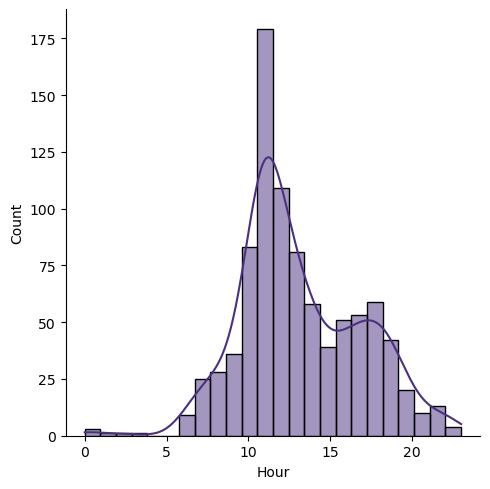

In [28]:
# Canceled hour
sns.displot(data=data2[data2['Status'] == 'Canceled'], x='Hour',bins=24, kde=True, color='#4A3180')

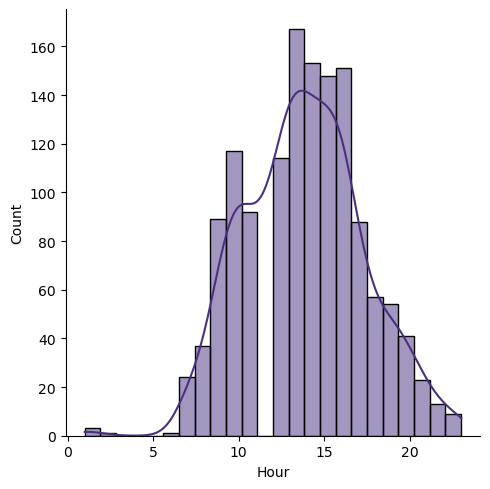

In [29]:
# Completed hour
sns.displot(data=data2[data2['Status'] == 'Completed'], x='Hour',bins=24, kde=True, color='#4A3180')

In [30]:
# Value of canceled order by Hour
data2[data2['Status'] == 'Canceled'].groupby('Hour')['Amount'].sum()

Hour
0       217.0
1       188.0
2        36.0
3        47.0
6       564.0
7      1485.0
8      1886.0
9      2944.0
10     5843.2
11    14426.2
12     9229.0
13     6357.6
14     4794.6
15     2803.2
16     3976.4
17     4183.8
18     4345.2
19     3037.4
20     1676.6
21      568.4
22      854.0
23      214.4
Name: Amount, dtype: float64

<Axes: xlabel='Hour'>

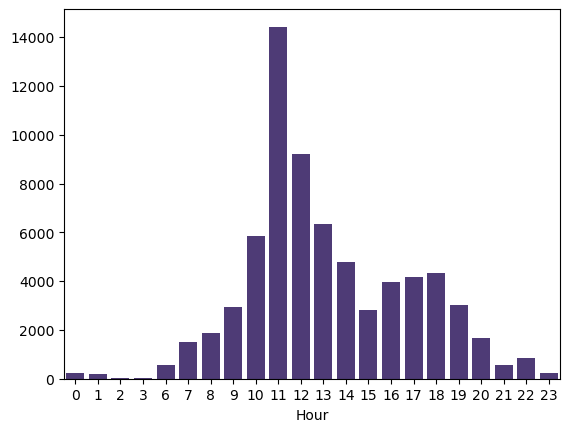

In [31]:
# Plot, Value of canceled order by Hour
data3 = data2[data2['Status'] == 'Canceled'].groupby('Hour')['Amount'].sum()
sns.barplot(x=data3.index, y=data3.values, color='#4A3180')